# Seblak Dropshipping Analysis - Web Scraping

## Background
---

1. **Problem Statement**

The purpose of this analysis is to diversify income sources through a dropshipping business, aiming to increase monthly revenue by 10%. It is expected that this increase can be achieved within the next 6 months. This endeavor aligns with personal financial goals of augmenting income through a supplementary occupation.

2. **Elaboration of the Problem Statement**

**Objective:** Increase Monthly Income

To address this issue, we will formulate several elaboration questions to assist in conducting analysis, possibly using the `5W + 1H` framework:

- What are the potential products for dropshipping?
- How much potential income can be generated from these products?
- What does the customer persona/profile of the buyers look like?
- Are there any variations in sales based on the source store?
- Etc.

These questions may expand as the analysis evolves.

**3. Data**

**Data Source**

To support this analysis, I utilized the `Web Scraping` method from a well-known e-commerce website, **Tokopedia**. I selected Tokopedia due to its popularity and high website traffic.

**Data Extracted**
| column name | Description |
|-------------|-------------|
| nama produk | Product names being sold |
| harga | Product prices |
| toko | Store names |
| asal | Store origins |
| rating | Product ratings |
| terjual | Quantity sold |

## Analysis

### Determining the Product

In this section, the analyst will attempt to identify interesting or potentially lucrative products for analysis as the target for dropshipping.

Observing rising trends, the analyst noticed an intriguing phenomenon related to the product *seblak*.

This is supported by the increasing search trend on Google for the keyword *seblak* over the past year. [*source*](https://trends.google.com/trends/explore?geo=ID&q=%2Fg%2F1q54w2qg2&hl=en-US)

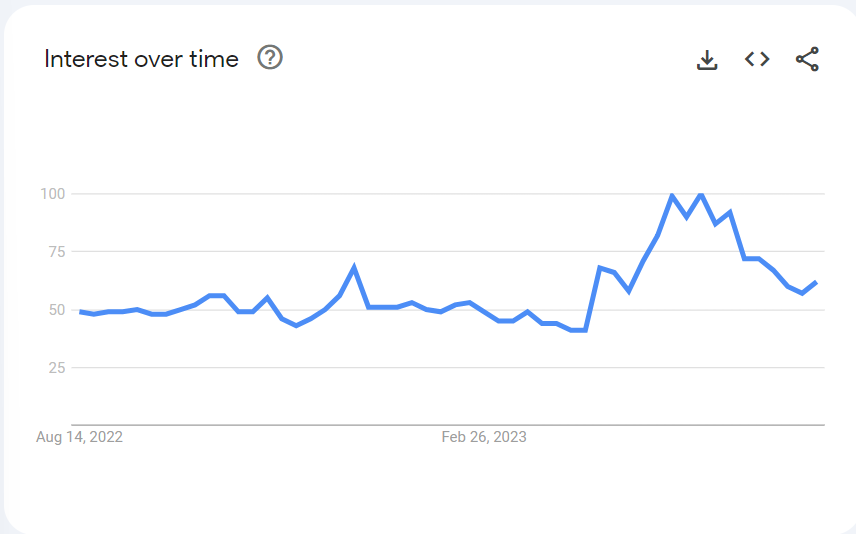

Therefore, in this analysis, we will focus on the *seblak* product.

### Data Collecting

1. **Web Scraping**

In this step, the analyst will retrieve 15 samples from 10 pages of *seblak* product search on the `Tokopedia` e-commerce platform as the data source for analysis.


In [2]:
# Library dan module
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd

In [3]:
# Set the driver
driver = webdriver.Chrome()

In [4]:
# Create empty list to keep the scrap result
list_nama = []
list_harga = []
list_toko = []
list_asal = []
list_terjual = []
list_rating = []

# Loop from page 1 to 10
for i in range(1,11):
    # Access the side
    site = 'https://www.tokopedia.com/search?navsource=&page={}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='.format(i)
    driver.get(site)
    time.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Loop item
    small_boxes = soup.find_all('div', {"class":"css-uwyh54"})
    for small_box in small_boxes[:15]:
        
        # scrape the product name
        try:
            produk = small_box.find('div', {"class":"prd_link-product-name css-3um8ox"})
            list_nama.append(produk.get_text())
        except:
            list_nama.append(None)

        # Scrape the product's price
        try:
            harga = small_box.find('div', {"class":"prd_link-product-price css-1ksb19c"})
            list_harga.append(harga.get_text())
        except:
            list_harga.append(None)

        # scrape the store name
        try:
            toko = small_box.find('span', {'class':"prd_link-shop-name css-1kdc32b flip"})
            list_toko.append(toko.get_text())
        except:
            list_toko.append(None)

        # scrape the store origin
        try:
            asal = small_box.find('span', {'class':"prd_link-shop-loc css-1kdc32b flip"})
            list_asal.append(asal.get_text())
        except:
            list_asal.append(None)

        # scrape the quantity sold
        try:
            terjual = small_box.find('span',{"class":"prd_label-integrity css-1duhs3e"})
            list_terjual.append(terjual.get_text())
        except:
            list_terjual.append(None)

        # scrape the product's rating
        try:
            rating = small_box.find('span',{"class":"prd_rating-average-text css-t70v7i"})
            list_rating.append(rating.get_text())
        except:
            list_rating.append(None)  

In [5]:
# Create a dataframe
df = pd.DataFrame()

df['nama produk'] = list_nama
df['harga'] = list_harga
df['toko'] = list_toko
df['asal'] = list_asal
df['rating'] = list_rating
df['terjual'] = list_terjual

df

,nama produk,harga,toko,asal,rating,terjual
0,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp15.000,Central Seblak Nusantara,Tangerang Selatan,4.9,Terjual 1 rb+
1,seblak instan jeletot jajanan hits bandung 1 p...,Rp4.180,tokomakanankalimantan,Jakarta Barat,4.8,Terjual 1 rb+
2,Termurah Kerupuk Mentah-Kerupuk Seblak-Kerupuk...,Rp6.000,Djuragan Kerupuk,Surabaya,5.0,Terjual 50+
3,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI - Mawar ...,Rp23.500,BociKakang,Jakarta Selatan,5.0,Terjual 100+
4,TERMURAH KERUPUK KRUPUK KERITING MAWAR PUTIH M...,Rp5.850,Kyta Bae,Kab. Sumedang,None,Terjual 30+
...,...,...,...,...,...,...
145,Mommy Seblak Basah Instant 100gr,Rp10.000,emmoshop,Kab. Bogor,4.9,Terjual 2 rb+
146,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp15.000,Central Seblak Nusantara,Tangerang Selatan,4.9,Terjual 1 rb+
147,SEBLAK INSTANT TERMURAH,Rp3.999,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,4.8,Terjual 10 rb+
148,seblak instant sajodo snak,Rp19.000,hikmah berkah jaya,Jakarta Barat,4.8,Terjual 750+


In [6]:
# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nama produk  150 non-null    object
 1   harga        150 non-null    object
 2   toko         150 non-null    object
 3   asal         150 non-null    object
 4   rating       133 non-null    object
 5   terjual      137 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


Data has been successfully obtained and stored as a `dataframe`. There are 150 rows or data entries collected, with 6 columns according to the initial *web scraping* plan. However, the data is not yet in the appropriate format and there are several *missing values* in columns such as `rating` and `terjual` (number sold). Further, before conducting further analysis, the data will undergo a *data cleaning* process.

2. **Data Cleaning**

The acquired data will undergo a *Data Cleaning* process, which includes:
- Checking and removing duplicate data
- Standardizing inconsistent data
- Adjusting data types to match stored values
- Handling missing values
- And more.

In [7]:
# Check for duplicate data
display(df.duplicated().sum())

40

In [8]:
# Drop the duplicate
data = df.drop_duplicates()

In [9]:
# Create function to convert and standardize `terjual` column
def converter(val):
    # Handling missing value
    if val is None:
        return 0 

    # remove 'terjual' dan '+'
    val = val.replace('Terjual', '').replace('+', '')
   
    if val.endswith('rb'):
        val = val[:-2] 
        return int(val) * 1000
    else:
        return int(val)

# Convert the column 
data['terjual'] = data['terjual'].apply(converter)

C:\Users\rikip\AppData\Local\Temp\ipykernel_23556\3464409116.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['terjual'] = data['terjual'].apply(converter)


In [10]:
# Create a function to handle the `harga` column
def converter_harga(val):
    # remove 'Rp' dan '.'
    val = val.replace('Rp', '').replace('.', '')
    
    # convert into float (since this is currency)
    return int(val)

# Apply the function
data['harga'] = data['harga'].apply(converter_harga)

C:\Users\rikip\AppData\Local\Temp\ipykernel_23556\2931862613.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['harga'] = data['harga'].apply(converter_harga)


In [11]:
# Check the dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 144
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nama produk  110 non-null    object
 1   harga        110 non-null    int64 
 2   toko         110 non-null    object
 3   asal         110 non-null    object
 4   rating       93 non-null     object
 5   terjual      110 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 6.0+ KB


From the results above, it can be observed that the `rating` column has *missing values*, which is due to some products not having received any reviews yet. Therefore, we will need to handle this data manipulation.

In [12]:
# for product that has not get rating yet, we impute 0
data['rating'].fillna('0', inplace=True)

# convert it into float
data['rating'] = data['rating'].astype(float)

C:\Users\rikip\AppData\Local\Temp\ipykernel_23556\1359723033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'].fillna('0', inplace=True)
C:\Users\rikip\AppData\Local\Temp\ipykernel_23556\1359723033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].astype(float)


In [13]:
# Check the dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 144
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nama produk  110 non-null    object 
 1   harga        110 non-null    int64  
 2   toko         110 non-null    object 
 3   asal         110 non-null    object 
 4   rating       110 non-null    float64
 5   terjual      110 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 6.0+ KB


Now the data is ready

### Data Analysis

1. Central Tendency, Skewness, and Kurtosis

In this section, the analyst will attempt to analyze the central tendency, skewness, and kurtosis of the columns: price, quantity of products sold, and rating.

In [14]:
# Create a function
def analisa_1(col):
    # Create an empty list
    list_df = []

    # Take the necessary data
    mean = data[col].mean()
    median = data[col].median()
    std = data[col].std()
    skew = data[col].skew()
    kurto = data[col].kurtosis()

    # add into the empty list
    list_df.append([col, mean, median, std, skew, kurto])

    # Transform it into dataframe
    result_df = pd.DataFrame(list_df, columns=["Column", "Mean", "Median", "Std", "Skew", "Kurtosis"])
    
    return result_df

In [15]:
from IPython.core.display import display, HTML

# Gunakan fungsi pada kolom rating, harga, dan jumlah terjual
for col in ['harga', 'rating', 'terjual']:
    display(HTML(f'<b><h2>{col}</h2></b><br>'))
    display(analisa_1(col))

C:\Users\rikip\AppData\Local\Temp\ipykernel_23556\1826204059.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,Column,Mean,Median,Std,Skew,Kurtosis
0,harga,20972.445455,15000.0,20573.913426,2.450433,6.973084


,Column,Mean,Median,Std,Skew,Kurtosis
0,rating,4.118182,4.9,1.776926,-1.904038,1.704796


,Column,Mean,Median,Std,Skew,Kurtosis
0,terjual,543.018182,95.0,1495.379311,5.050299,28.666269


- **Column `Harga`**:
    - On this column, the average price of "seblak" is around Rp20,972.44.
    - It has a median value of Rp15,000.
    - With a standard deviation of approximately Rp20,573.91.
    - The positive skewness value (2.45) indicates a *highly skewed* distribution with a rightward tail.
    - The kurtosis value of around 6.97 suggests a *Leptokurtic* distribution.

- **Column `Rating`**:
    - The average rating of "seblak" products on Tokopedia is 4.11.
    - With a median value of 4.9.
    - Its standard deviation is 1.77.
    - The negative skew value (-1.90) indicates a *highly skewed* distribution with a leftward tail.
    - The kurtosis value of 1.70 indicates a *Leptokurtic* distribution.

- **Column `Terjual`**:
    - The average number of products sold is approximately 543 pcs.
    - With a median value of 95 pcs.
    - It has a relatively large standard deviation of about 1495.
    - The skewness value of 5.05 indicates a *highly skewed* distribution that is right-skewed.
    - The kurtosis value of 28.66 indicates a *Leptokurtic* data shape.

2. Potensial Pendapatan

If the analyst is interested in dropshipping the *seblak* products, it's important to understand the potential market demand for this product. Therefore, in this section, we will analyze the potential income range that can be generated. We will focus on two columns: the quantity of units/pcs sold and use the confidence interval (assuming a normal distribution) to assess this potential.

In [16]:
# Import library dan modul for analysis
from scipy import stats
import numpy as np

In [17]:
# confidence interval of `harga`
std = data['terjual'].std()
N = len(data)
low, up = stats.norm.interval(0.95,loc=data['terjual'].mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 263.5688238061347
Upper Limit: 822.4675398302289


In [18]:
# Revenue probability range
low_revenue = low * data['harga'].mean()
up_revenue = up * data['harga'].mean()

print(f'The income opportunity to be obtained is around Rp{low_revenue} - Rp{up_revenue}')

Peluang pendapatan yang akan diperoleh berkisar Rp5527682.78079286 - Rp17249155.617223665


- Based on the confidence interval analysis, the average sales are estimated to be around **263 - 822 pcs** with a 95% confidence level.
- When calculated with the average price, the potential income range is approximately **Rp5,527,682 - Rp17,249,155**.

3. Analisis Lokasi dengan Harga

Based on the collected data, the analyst has questions related to the seller's location. The question pertains to whether there are price differences for the products sold based on the seller's location between the Jabodetabek (Jakarta, Bogor, Depok, Tangerang, Bekasi) region and non-Jabodetabek regions. This consideration arises due to the potential variation in raw material costs and shipping fees. In this section, the analyst will employ inferential statistical approaches to test the following hypothesis:

> **Null Hypothesis (H0):** The prices of "seblak" in Jabodetabek and non-Jabodetabek regions are the same.
> 
> **Alternative Hypothesis (H1):** There is a difference in prices between Jabodetabek and non-Jabodetabek regions, or the location has an influence on the price.

The test to be conducted in this section is a two-sample independent t-test, as it involves comparing prices between two categories or groups of origin cities. This test assumes that the obtained data is normally distributed.


In [25]:
# Unique Value of `asal` columns
data['asal'].unique()

array(['Tangerang Selatan', 'Jakarta Barat', 'Surabaya',
       'Jakarta Selatan', 'Kab. Sumedang', 'Kab. Bandung',
       'Jakarta Pusat', 'Kab. Bekasi', 'Bekasi', 'Kab. Bogor',
       'Kab. Garut', 'Bandung', 'Kab. Bandung Barat', 'Kab. Sidoarjo',
       'Jakarta Utara', 'Tangerang', 'Medan', 'Depok', 'Jakarta Timur',
       'Kab. Bantul', 'Kab. Tasikmalaya', 'Kab.Ciamis', 'Kab. Tangerang',
       'Cimahi', 'Kab. Karawang', 'Tasikmalaya'], dtype=object)

In [35]:
# Create a list of Jabodetabek cities
jabodetabek = ['Tangerang Selatan', 'Jakarta Barat', 'Jakarta Selatan', 'Jakarta Pusat',
               'Kab. Bekasi', 'Bekasi', 'Kab. Bogor', 'Jakarta Utara', 'Tangerang', 'Depok', 'Jakarta Timur',
               'Kab. Tangerang']

# Data jabodetabek
data_jabodetabek = data[data['asal'].isin(jabodetabek)]
data_jabodetabek

,nama produk,harga,toko,asal,rating,terjual
0,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,15000,Central Seblak Nusantara,Tangerang Selatan,4.9,1000
1,seblak instan jeletot jajanan hits bandung 1 p...,4180,tokomakanankalimantan,Jakarta Barat,4.8,1000
3,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI - Mawar ...,23500,BociKakang,Jakarta Selatan,5.0,100
6,seblak instant sajodo snak,19000,hikmah berkah jaya,Jakarta Barat,4.8,750
7,Kerupuk Mawar Bahan Seblak Babangi 250 Gram,7000,Alanza Frozen Food,Tangerang Selatan,5.0,17
8,Seblak Instan Pedas Home Made,3500,the Dhecip,Tangerang Selatan,4.8,1000
9,SEBLAK JELETET MURNI (AJAHH),26500,Seblak Jeletet Murni,Jakarta Pusat,4.9,1000
11,Seblak Basranger Extra Pedas 200gr,17300,Rak Sebelah,Jakarta Pusat,4.9,250
12,SEBLAK JELETET MURNI (SEXXY),40000,Seblak Jeletet Murni,Jakarta Pusat,4.9,250
13,SEBLAK JELETET MURNI (UNYUU),26500,Seblak Jeletet Murni,Jakarta Pusat,4.8,250


In [36]:
# Data non-jabodetabek
data_not_jabodetabek = data[~data['asal'].isin(jabodetabek)]
data_not_jabodetabek

,nama produk,harga,toko,asal,rating,terjual
2,Termurah Kerupuk Mentah-Kerupuk Seblak-Kerupuk...,6000,Djuragan Kerupuk,Surabaya,5.0,50
4,TERMURAH KERUPUK KRUPUK KERITING MAWAR PUTIH M...,5850,Kyta Bae,Kab. Sumedang,0.0,30
5,KERUPUK MENTAH SERBA 5000 BAHAN SEBLAK,6000,GK_Snack,Kab. Bandung,5.0,500
15,Seblak Cocol Seblak Coet Seblak Viral Seblak B...,5000,FAG COLLECTION,Surabaya,0.0,0
19,Paket Seblak Komplit Instan Pedas Gurih Cobek ...,15000,LarisManis shopp,Kab. Bandung,0.0,0
24,Seblak Instan Komplit Pedas Gurih Nikmat,5999,Baso Aci Ayang,Kab. Garut,4.9,2000
25,Seblak Kering Kurupuk Extra Pedas 1Kg Super Re...,5000,FIRMAN TEGAR ADI GUNA,Kab. Bandung,4.7,6
26,Paket Seblak Tjap Harian,10500,bawang putih tjap harian,Bandung,4.9,250
27,Siomay Cuanki Kering Isi 25pcs Toping Seblak d...,7599,gaiagarut,Kab. Garut,4.9,100
28,siomay mini GURILEM EKONOMIS 50gram Toping Bas...,1710,gaiagarut,Kab. Garut,4.5,6


In [37]:
# Melakukan uji tes
t_stat, p_val = stats.ttest_ind(data_jabodetabek['harga'], data_not_jabodetabek['harga'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 0.09009629716602793
P-value: 0.9283775701111487


based on the calculation above, a high p-value (> 0.05) indicates that there is not enough evidence to reject the null hypothesis. This suggests that differences between cities of origin are not statistically significant.

4. Shopping Behavior

The analyst has conducted analyses related to price and location. Next, the analyst is interested in exploring whether there is a correlation between price and sales. Does cheaper pricing tend to result in higher sales, or is there a lack of correlation altogether?

To address this question, the analyst will employ a *correlation analysis* using the *Pearson* correlation technique. This method is chosen as it involves comparing two continuous columns, namely `harga` (price) and `terjual` (sold quantity).

Feel free to adjust the formatting if needed!

In [32]:
# Correlation analysis
corr_r, pval_p = stats.pearsonr(data['harga'], data['terjual'])

print("Pearson Correlation score:", corr_r)
print("P-value:", pval_p)

Skor Pearson Correlation: -0.021189453585013993
Skor P-value: 0.8260870430143678


Based on the obtained *Pearson* correlation score, there is a negative correlation between price and the quantity of items sold. This indicates that as the price increases, the sales tend to decrease. However, the correlation value obtained is only around -0.02, suggesting that the relationship or correlation is quite weak.

However, looking at the *p-value* score, it is larger than the critical value. This indicates that there is not enough evidence to reject the null hypothesis (*H0*), which assumes no correlation between the variables. On the other hand, the alternative hypothesis (*H1*) assumes the presence of a correlation. This means that there is not sufficient evidence to conclude a significant linear correlation between the `harga` and `terjual` variables in the dataset obtained by the analyst, even though there is a weak connection.

## Conclusion

There are several conclusions that the analyst can draw from this analysis, providing insights for the dropshipping plan to enhance or supplement monthly income:

- The dropshipping business for "seblak" products seems promising, with the potential sales ranging from **Rp5,527,682 - Rp17,249,155**. If a 10% commission on net income is obtained, the potential earnings would be **Rp552,768 - Rp1,724,915**. These values align with the target of a 10% monthly income increase (assuming the current monthly income is around 5 million).
  
- There is no apparent difference in terms of selling price and location (Jabodetabek or non-Jabodetabek). This presents a significant opportunity, as sales will not be restricted or impacted by location-based variations. Therefore, a distinct marketing strategy is necessary to attract customers, given the lack of a competitive advantage stemming from location.

- Additionally, there is a weak negative correlation between price and sales, though statistically insignificant. This could be taken into consideration when devising a pricing strategy to align sales with expectations.
  
Embarking on the dropshipping of "seblak" products seems to be a suitable solution for the addressed challenges. However, conducting careful and strategic steps based on the conducted analysis is essential to achieve the desired goals.
